In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import matplotlib.animation as animation

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [88]:
# company_names = ['DBR', 'AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
#                  'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW', 'NDB',
#                  'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'UCBAG', 'BACF-BankNA',
#                  'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

company_names = ['AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
                 'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW', 'NDB',
                 'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'UCBAG', 'BACF-BankNA',
                 'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

company_names_aw = ['AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
                 'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW',
                 'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'BACF-BankNA',
                 'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

In [89]:
df_spreads = pd.read_csv('Data/cleaned_spreads.csv')
df_spreads_detrended = pd.read_csv('Data/cleaned_spreads_detrended.csv')
df_SP500 = pd.read_csv('Data/S&P 500 Historical Data.csv')

In [90]:
def timestamp_R(df):
    timestamps = []
    for i,date in enumerate(df['Date']):
        timestamp = datetime.strptime(date, '%d-%m-%y')
        timestamps += [timestamp]
    return timestamps

In [91]:
for i,date in enumerate(df_spreads['Date']):
    timestamp = datetime.strptime(date, '%d-%m-%y')
    df_spreads['Date'][i] = timestamp

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


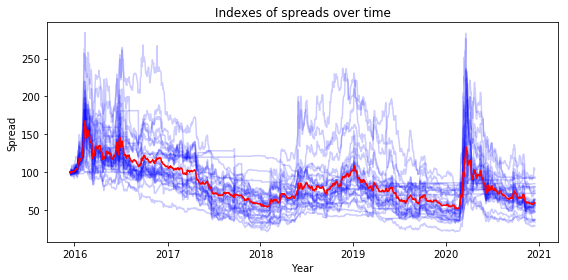

In [92]:
avg_spread = df_spreads[company_names].mean(axis=1)

index_avg_spread = 100*avg_spread/avg_spread[0]

fig = plt.figure(figsize=(8,4))
for company_name in company_names:
    index = 100*df_spreads[company_name]/df_spreads[company_name][0]
#     ax1.plot(df_spreads['Date'], df_spreads[company_name], alpha=0.2, color='blue')
    plt.plot(df_spreads['Date'], index, alpha=0.2, color='blue')
plt.plot(df_spreads['Date'], index_avg_spread, color='red')
plt.ylabel('Spread')
plt.xlabel('Year')
plt.title('Indexes of spreads over time')
plt.tight_layout()
plt.savefig('Figures/spreads_indexes.pdf', bbox_inches='tight', dpi=150)
plt.show()

In [93]:
for i,date in enumerate(df_SP500['Date']):
    timestamp = datetime.strptime(date, '%b %d, %Y')
    df_SP500['Date'][i] = timestamp

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


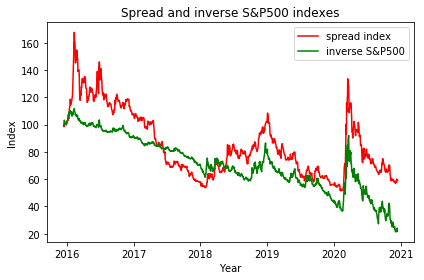

In [94]:
index_SP500 = 100-100*df_SP500['Close']/df_SP500['Close'][0] + 100

plt.figure(figsize=(6,4))
plt.plot(df_spreads['Date'], index_avg_spread, color='red', label='spread index')
plt.plot(df_SP500['Date'], index_SP500, color='green', label='inverse S&P500')
plt.legend()
plt.ylabel('Index')
plt.xlabel('Year')
plt.title('Spread and inverse S&P500 indexes')
plt.tight_layout()
plt.savefig('Figures/spread_SP500_indexes.png', bbox_inches='tight', dpi=150)
plt.show()

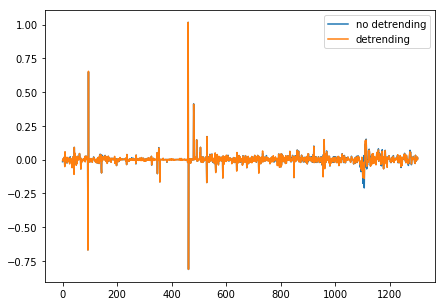

In [95]:
no_detrend_logret = np.log(df_spreads['AMROBK']/df_spreads['AMROBK'].shift(-1))
SP500_logret = np.log(df_SP500['Close']/df_SP500['Close'].shift(-1))

plt.figure(figsize=(7,5))
plt.plot(range(len(no_detrend_logret)), no_detrend_logret, label='no detrending')
plt.plot(range(len(df_spreads_detrended['AMROBK'])), df_spreads_detrended['AMROBK'], label='detrending')
plt.legend()
plt.show()

In [96]:
# print(no_detrend_logret['AMROBK'][100:200])

plt.figure(figsize=(7,5))
plt.plot(range(len(no_detrend_logret[100:200])), no_detrend_logret[100:200], label='no detrending')
plt.plot(df_SP500['Date'][100:200], SP500_logret[100:200], label='S&P 500')
plt.legend()
plt.show()

ValueError: view limit minimum -36811.85 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [108]:
df_R_pearson = pd.read_csv('R_scores/R_score_pearson.csv')
df_R_pearson_detrended = pd.read_csv('R_scores/R_score_Pearson_detrended.csv')
df_R_pearson_detrended_movingbeta = pd.read_csv('R_scores/R_score_Pearson_detrended_movingbeta.csv')

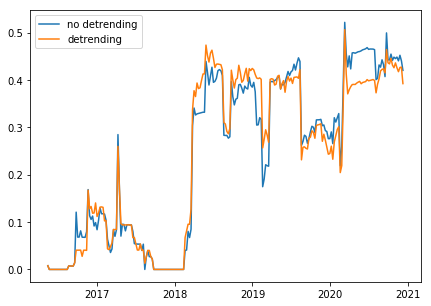

In [109]:
plt.figure(figsize=(7,5))
plt.plot(timestamp_R(df_R_pearson), df_R_pearson['AMROBK'], label='no detrending')
plt.plot(timestamp_R(df_R_pearson_detrended), df_R_pearson_detrended['AMROBK'], label='detrending')
plt.legend()
plt.show()

In [110]:
df_R_pearson_timelag = pd.read_csv('R_scores/R_score_Pearson_timelag.csv')
df_R_pearson_timelag_detrended = pd.read_csv('R_scores/R_score_pearson_timelag_detrended.csv')
df_R_pearson_timelag_detrended_movingbeta = pd.read_csv('R_scores/R_score_pearson_timelag_detrended_movingbeta.csv')

In [111]:
df_R_granger = pd.read_csv('R_scores/R_score_Granger.csv')
df_R_granger_detrended = pd.read_csv('R_scores/R_score_granger_detrended.csv')
df_R_granger_detrended_movingbeta = pd.read_csv('R_scores/R_score_granger_detrended_movingbeta.csv')

In [112]:
df_R_drawups = pd.read_csv('R_scores/R_score_drawups.csv')
df_R_drawups_detrended = pd.read_csv('R_scores/R_score_drawups_detrended.csv')
df_R_drawups_detrended_movingbeta = pd.read_csv('R_scores/R_score_drawups_detrended_movingbeta.csv')

In [113]:
df_R_granger_detrended.head()

,Unnamed: 0,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,ERGBA,...,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA,Date
0,0,0.096666,0.001741,0.304714,0.340385,0.173881,0.344852,0.326324,0.304494,0.0,...,0.006048,0.027093,0.282587,0.0,0.296379,0.270516,0.286807,0.006809,0.025490,16-05-16
1,1,0.091735,0.000000,0.299355,0.338979,0.173367,0.343756,0.327529,0.304438,0.0,...,0.000000,0.028125,0.282144,0.0,0.295101,0.266758,0.284994,0.007191,0.027058,23-05-16
2,2,0.105865,0.000000,0.304083,0.340705,0.179400,0.345449,0.324550,0.303626,0.0,...,0.000000,0.028242,0.284141,0.0,0.293211,0.266664,0.287134,0.009665,0.033414,30-05-16
3,3,0.104982,0.000000,0.307644,0.348330,0.185838,0.348182,0.323930,0.305131,0.0,...,0.000000,0.028170,0.285236,0.0,0.295640,0.267330,0.288882,0.013384,0.031267,06-06-16
4,4,0.104092,0.000000,0.304186,0.344019,0.169933,0.347004,0.322692,0.303614,0.0,...,0.000000,0.028519,0.276800,0.0,0.286850,0.265992,0.280822,0.013639,0.030219,13-06-16


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


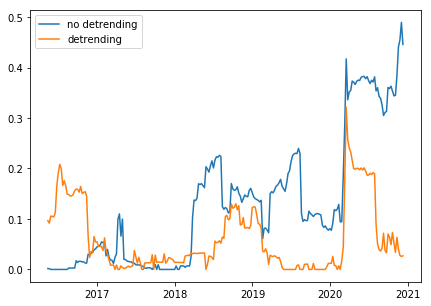

In [114]:
plt.figure(figsize=(7,5))
plt.plot(timestamp_R(df_R_granger), df_R_granger['AMROBK'], label='no detrending')
plt.plot(timestamp_R(df_R_granger_detrended), df_R_granger_detrended['AMROBK'], label='detrending')
plt.legend()
plt.show()

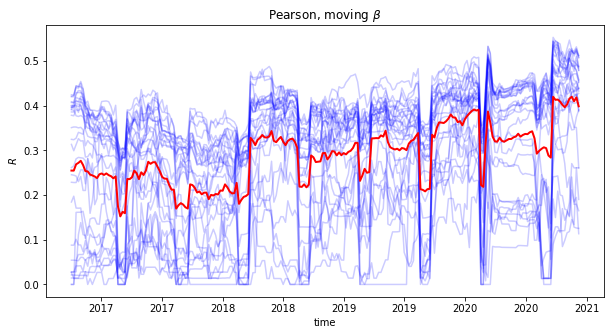

In [115]:
# Plot R scores and average R score for pearson
fig, ax = plt.subplots(figsize=(10,5))

for company_name in company_names:
    plt.plot(timestamp_R(df_R_pearson_detrended_movingbeta), 
             df_R_pearson_detrended_movingbeta[company_name], alpha=0.2, color='blue')

avg_R = np.mean(df_R_pearson_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_pearson_detrended_movingbeta), avg_R, color='red', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel(r'$R$')
plt.xlabel('time')
plt.title(r'Pearson, moving $\beta$')
# plt.savefig('Figures/R_pearson_detrended_movingbeta.pdf', bbox_inches='tight')
plt.show()

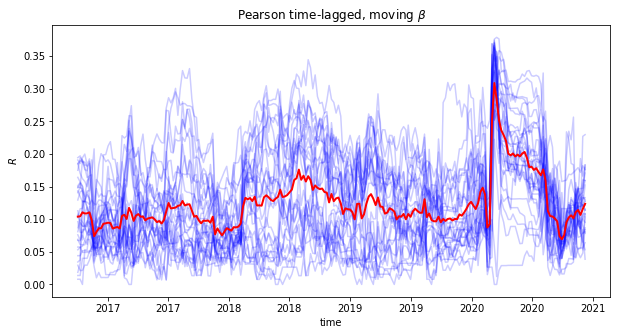

In [116]:
# Plot R scores and average R score for pearson
fig, ax = plt.subplots(figsize=(10,5))

for company_name in company_names:
    plt.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), 
             df_R_pearson_timelag_detrended_movingbeta[company_name], alpha=0.2, color='blue')

avg_R = np.mean(df_R_pearson_timelag_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), avg_R, color='red', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel(r'$R$')
plt.xlabel('time')
plt.title(r'Pearson time-lagged, moving $\beta$')
# plt.savefig('Figures/R_pearson_timelag_detrended_movingbeta.pdf', bbox_inches='tight')
plt.show()

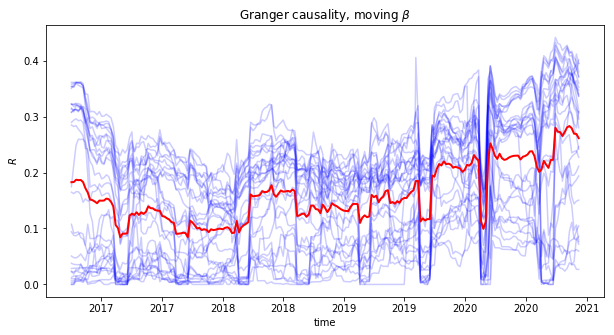

In [117]:
# Plot R scores and average R score for pearson
fig, ax = plt.subplots(figsize=(10,5))

for company_name in company_names:
    plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
             df_R_granger_detrended_movingbeta[company_name], alpha=0.2, color='blue')

avg_R = np.mean(df_R_granger_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), avg_R, color='red', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel(r'$R$')
plt.xlabel('time')
plt.title(r'Granger causality, moving $\beta$')
# plt.savefig('Figures/R_granger_detrended_movingbeta.pdf', bbox_inches='tight')
plt.show()

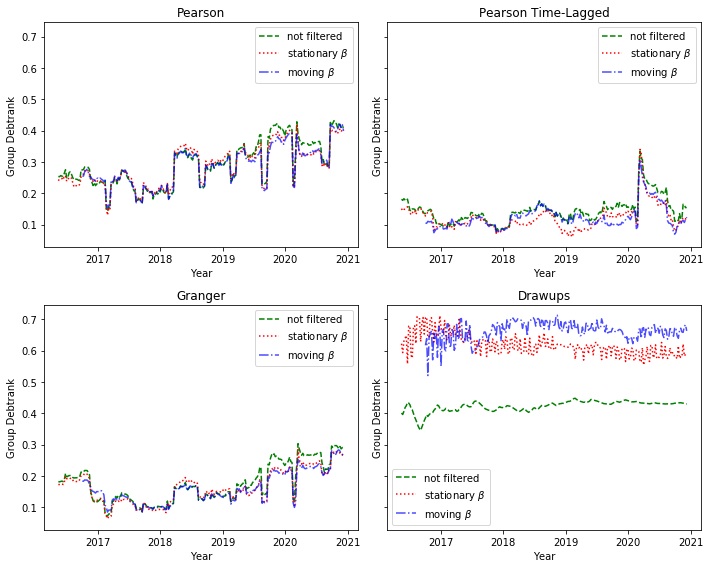

In [128]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize=(10,8), sharey=True)

pearson_avg_R = df_R_pearson[company_names].mean(axis=1)
pearson_avg_R_detrended = df_R_pearson_detrended[company_names].mean(axis=1)
pearson_avg_R_detrended_movingbeta = df_R_pearson_detrended_movingbeta[company_names].mean(axis=1)
ax1.plot(timestamp_R(df_R_pearson), 
         pearson_avg_R, label='not filtered', color='green', linestyle='--')
ax1.plot(timestamp_R(df_R_pearson_detrended), 
         pearson_avg_R_detrended, label=r'stationary $\beta$', color='red', linestyle='dotted')
ax1.plot(timestamp_R(df_R_pearson_detrended_movingbeta), 
         pearson_avg_R_detrended_movingbeta, label=r'moving $\beta$', color='blue', linestyle='dashdot', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Group Debtrank')
ax1.set_title('Pearson')
ax1.legend()

pearson_timelag_avg_R = df_R_pearson_timelag[company_names].mean(axis=1)
pearson_timelag_avg_R_detrended = df_R_pearson_timelag_detrended[company_names].mean(axis=1)
pearson_timelag_avg_R_detrended_movingbeta = df_R_pearson_timelag_detrended_movingbeta[company_names].mean(axis=1)
ax2.plot(timestamp_R(df_R_pearson_timelag), 
         pearson_timelag_avg_R, label='not filtered', color='green', linestyle='--')
ax2.plot(timestamp_R(df_R_pearson_timelag_detrended), 
         pearson_timelag_avg_R_detrended, label=r'stationary $\beta$', color='red', linestyle='dotted')
ax2.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), 
         pearson_timelag_avg_R_detrended_movingbeta, label=r'moving $\beta$', color='blue', linestyle='dashdot', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Group Debtrank')
ax2.set_title('Pearson Time-Lagged')
ax2.legend()

granger_avg_R = df_R_granger[company_names].mean(axis=1)
granger_avg_R_detrended = df_R_granger_detrended[company_names].mean(axis=1)
granger_avg_R_detrended_movingbeta = df_R_granger_detrended_movingbeta[company_names].mean(axis=1)
ax3.plot(timestamp_R(df_R_granger), 
         granger_avg_R, label='not filtered', color='green', linestyle='--')
ax3.plot(timestamp_R(df_R_granger_detrended), 
         granger_avg_R_detrended, label=r'stationary $\beta$', color='red', linestyle='dotted')
ax3.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         granger_avg_R_detrended_movingbeta, label=r'moving $\beta$', color='blue', linestyle='dashdot', alpha=0.7)
ax3.set_xlabel('Year')
ax3.set_ylabel('Group Debtrank')
ax3.set_title('Granger')
ax3.legend()

drawups_avg_R = df_R_drawups[company_names].mean(axis=1)
drawups_avg_R_detrended = df_R_drawups_detrended[company_names].mean(axis=1)
drawups_avg_R_detrended_movingbeta = df_R_drawups_detrended_movingbeta[company_names].mean(axis=1)
ax4.plot(timestamp_R(df_R_drawups), 
         drawups_avg_R, label='not filtered', color='green', linestyle='--')
ax4.plot(timestamp_R(df_R_granger_detrended), 
         drawups_avg_R_detrended, label=r'stationary $\beta$', color='red', linestyle='dotted')
ax4.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         drawups_avg_R_detrended_movingbeta, label=r'moving $\beta$', color='blue', linestyle='dashdot', alpha=0.7)
ax4.legend()
ax4.set_xlabel('Year')
ax4.set_ylabel('Group Debtrank')
ax4.set_title('Drawups')
ax4.legend()


plt.tight_layout()
plt.savefig('Figures/R_comparisson_overtime.pdf', bbox_inches='tight', dpi=200)
plt.show()

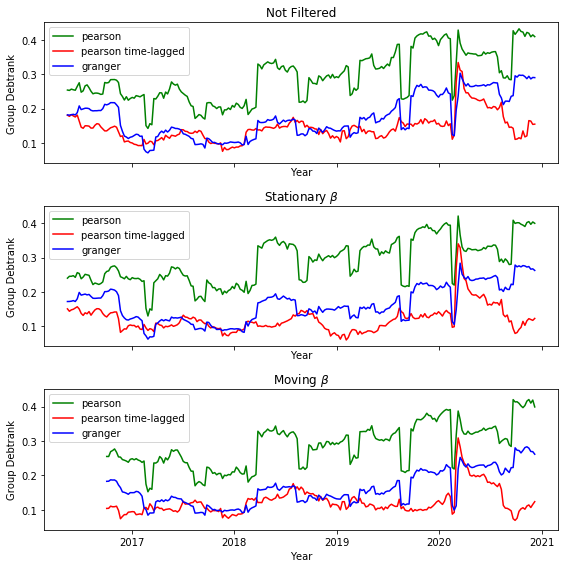

In [129]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1,figsize=(8,8), sharex=True, sharey=True)

ax1.plot(timestamp_R(df_R_pearson), 
         pearson_avg_R, label='pearson', color='green')
ax1.plot(timestamp_R(df_R_pearson_timelag), 
         pearson_timelag_avg_R, label='pearson time-lagged', color='red')
ax1.plot(timestamp_R(df_R_granger), 
         granger_avg_R, label='granger', color='blue')

ax1.set_xlabel('Year')
ax1.set_ylabel('Group Debtrank')
ax1.set_title('Not Filtered')
ax1.legend()

ax2.plot(timestamp_R(df_R_pearson_detrended), 
         pearson_avg_R_detrended, label='pearson', color='green')
ax2.plot(timestamp_R(df_R_pearson_timelag_detrended), 
         pearson_timelag_avg_R_detrended, label='pearson time-lagged', color='red')
ax2.plot(timestamp_R(df_R_granger_detrended), 
         granger_avg_R_detrended, label='granger', color='blue')

ax2.set_xlabel('Year')
ax2.set_ylabel('Group Debtrank')
ax2.set_title(r'Stationary $\beta$')
ax2.legend()

ax3.plot(timestamp_R(df_R_pearson_detrended_movingbeta), 
         pearson_avg_R_detrended_movingbeta, label='pearson', color='green')
ax3.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), 
         pearson_timelag_avg_R_detrended_movingbeta, label='pearson time-lagged', color='red')
ax3.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         granger_avg_R_detrended_movingbeta, label='granger', color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('Group Debtrank')
ax3.set_title(r'Moving $\beta$')
ax3.legend()

plt.tight_layout()
plt.savefig('Figures/detrending_comparissons.pdf', bbox_inches='tight')
plt.show()

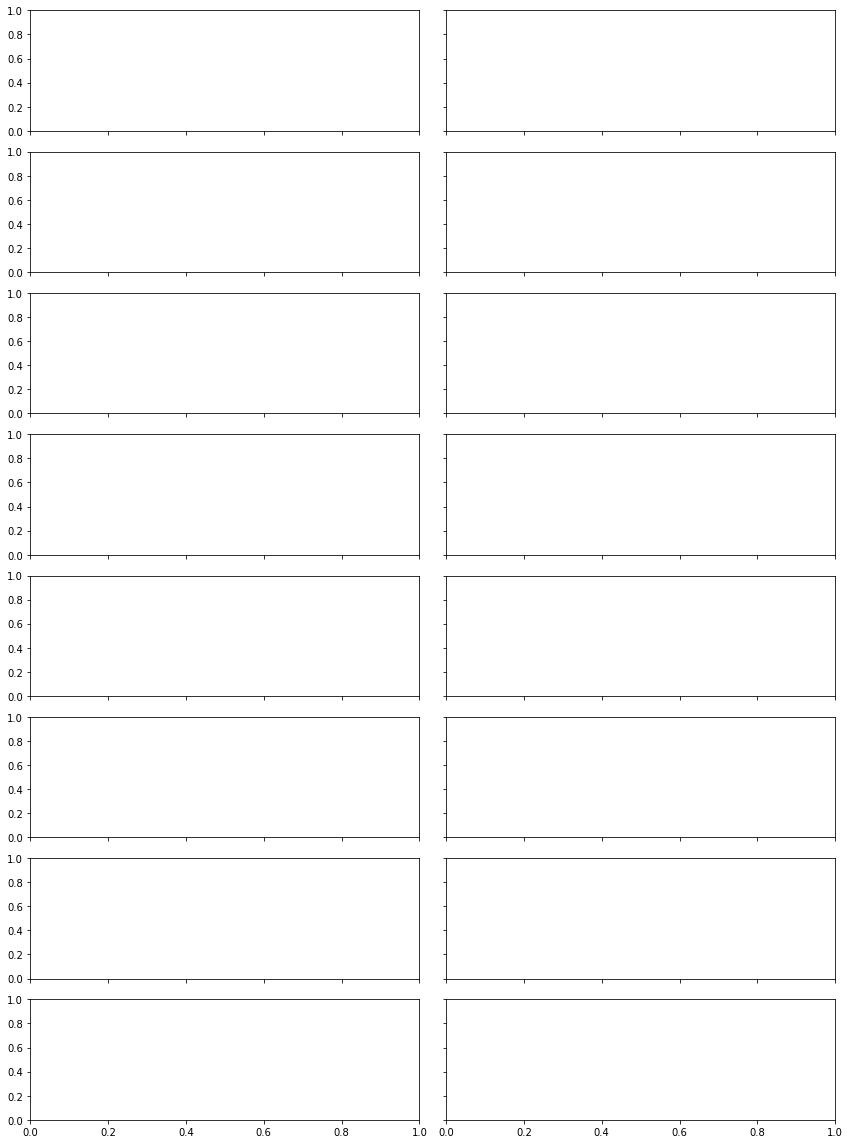

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BA018DC50>


In [120]:
fig, ax = plt.subplots(8,2, figsize=(12,16), sharey=True, sharex=True)
plt.tight_layout()
plt.show()
print(ax)

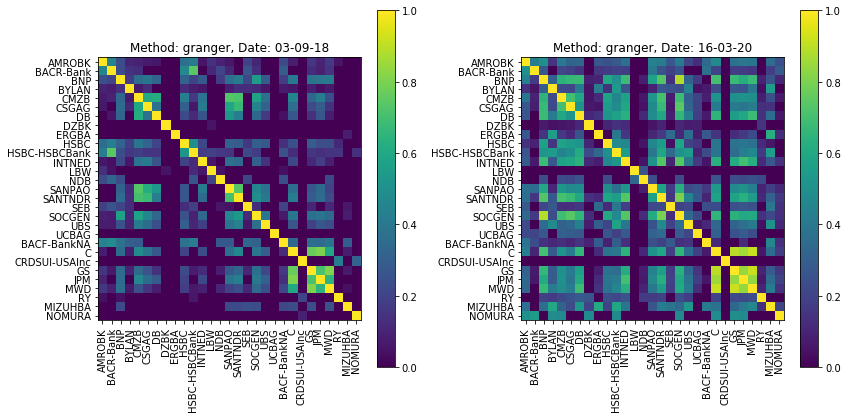

In [147]:
# Open weights

methods = ['pearson', 'pearson_timelag', 'granger']
methods = ['granger']

for method in methods:
    fig, [ax1,ax2] = plt.subplots(1,2 , figsize=(12,6))
    
    df_W = pd.read_csv(f'W_timeseries/W_{method}_detrended_movingbeta.csv')
    
    W1 = np.array(df_W.iloc[100].values[2:].tolist()).reshape(len(company_names), len(company_names))
    W2 = np.array(df_W.iloc[180].values[2:].tolist()).reshape(len(company_names), len(company_names))

    im1 = ax1.imshow(W1)
    ax1.set_title(f'Method: {method}, Date: '+df_W.iloc[100]['Date'])
    
    plt.sca(ax1)
    plt.yticks(ticks=range(W1.shape[0]), labels=company_names)
    plt.xticks(range(W1.shape[1]), labels=company_names, rotation=90)
    
    im2 = ax2.imshow(W2)
    ax2.set_title(f'Method: {method}, Date: '+df_W.iloc[180]['Date'])
    plt.sca(ax2)
    plt.yticks(ticks=range(W1.shape[0]), labels=company_names)
    plt.xticks(range(W1.shape[1]), labels=company_names, rotation=90)
    
    fig.colorbar(im2, ax=ax1)
    fig.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.savefig(f'Figures/corrmat_{method}.pdf', bbox_inches='tight', dpi=200)
    plt.show()

In [122]:
df_R_granger_detrended_movingbeta_assetweights = pd.read_csv('R_scores/R_score_granger_detrended_movingbeta_assetweights.csv')

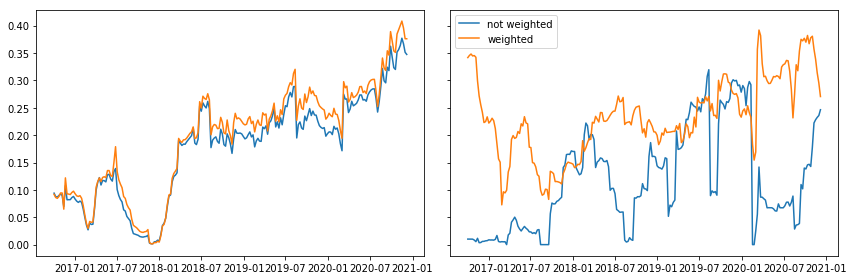

In [123]:
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(12,4), sharey=True)

ax1.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         df_R_granger_detrended_movingbeta['HSBC'],
         label='not weighted')
ax1.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights), 
         df_R_granger_detrended_movingbeta_assetweights['HSBC'],
         label='weighted')

ax2.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         df_R_granger_detrended_movingbeta['RY'],
         label='not weighted')
ax2.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights), 
         df_R_granger_detrended_movingbeta_assetweights['RY'],
         label='weighted')

plt.tight_layout()
plt.legend()
plt.show()

In [124]:
avg_R_assetweighted = df_R_granger_detrended_movingbeta_assetweights[company_names_aw].mean(axis=1)

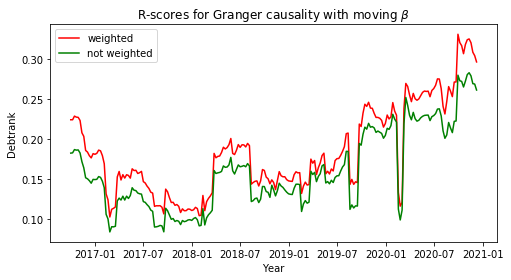

In [125]:
fig, ax, plt.figure(figsize=(8,4))

plt.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights),
         avg_R_assetweighted,
         color='red',
         label = 'weighted')
avg_R = np.mean(df_R_granger_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         avg_R, 
         color='green',
         label='not weighted')
plt.legend()
plt.ylabel('Debtrank')
plt.xlabel('Year')
plt.title(r'R-scores for Granger causality with moving $\beta$')
plt.savefig('weighted_nonweighted_avg_comparison.pdf', bbox_inches='tight')
plt.show()                  

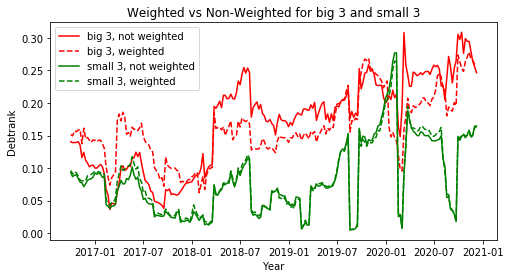

In [86]:
avg_R_big3 = np.mean(df_R_granger_detrended_movingbeta[['JPM', 'BACF-BankNA', 'HSBC']], axis=1)
avg_R_small3 = np.mean(df_R_granger_detrended_movingbeta[['LBW', 'ERGBA', 'BYLAN']], axis=1)

avg_R_big3_aw = np.mean(df_R_granger_detrended_movingbeta_assetweights[['JPM', 'BACF-BankNA', 'HSBC']], axis=1)
avg_R_small3_aw = np.mean(df_R_granger_detrended_movingbeta_assetweights[['LBW', 'ERGBA', 'BYLAN']], axis=1)

fig, ax, plt.figure(figsize=(8,4))

plt.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights),
         avg_R_big3,
         color='red',
         label = 'big 3, not weighted')
plt.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights),
         avg_R_big3_aw,
         color='red',
         label = 'big 3, weighted',
         linestyle='--')

plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         avg_R_small3, 
         color='green',
         label='small 3, not weighted')
plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         avg_R_small3_aw, 
         color='green',
         label='small 3, weighted',
         linestyle='--')

plt.legend()
plt.ylabel('Debtrank')
plt.xlabel('Year')
plt.title(r'Weighted vs Non-Weighted for big 3 and small 3')
plt.savefig('weighted_big3_small3.pdf', bbox_inches='tight')
plt.show()                  

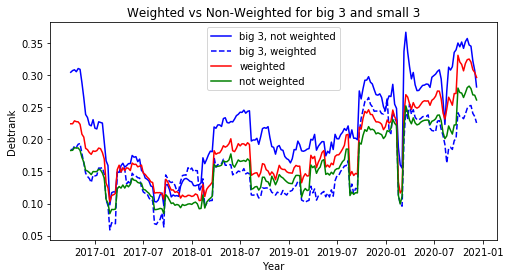

In [150]:
avg_R_big3 = np.mean(df_R_granger_detrended_movingbeta[['JPM', 'GS', 'C', 'MWD']], axis=1)
avg_R_small3 = np.mean(df_R_granger_detrended_movingbeta[['LBW', 'ERGBA', 'BYLAN']], axis=1)

avg_R_big3_aw = np.mean(df_R_granger_detrended_movingbeta_assetweights[['JPM', 'GS', 'C', 'MWD']], axis=1)
avg_R_small3_aw = np.mean(df_R_granger_detrended_movingbeta_assetweights[['LBW', 'ERGBA', 'BYLAN']], axis=1)

fig, ax, plt.figure(figsize=(8,4))

plt.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights),
         avg_R_big3,
         color='blue',
         label = 'big 3, not weighted')
plt.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights),
         avg_R_big3_aw,
         color='blue',
         label = 'big 3, weighted',
         linestyle='--')

# plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
#          avg_R_small3, 
#          color='green',
#          label='small 3, not weighted')
# plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
#          avg_R_small3_aw, 
#          color='green',
#          label='small 3, weighted',
#          linestyle='--')

plt.plot(timestamp_R(df_R_granger_detrended_movingbeta_assetweights),
         avg_R_assetweighted,
         color='red',
         label = 'weighted')
avg_R = np.mean(df_R_granger_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         avg_R, 
         color='green',
         label='not weighted')

plt.legend()
plt.ylabel('Debtrank')
plt.xlabel('Year')
plt.title(r'Weighted vs Non-Weighted for big 3 and small 3')
# plt.savefig('weighted_big3_small3.pdf', bbox_inches='tight')
plt.show()                  